In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
f = open('/content/drive/MyDrive/DiverseVul.VulnerableCode.json')
data = json.load(f)
df = pd.DataFrame(data)
#df.drop(['_id', 'cwe','project','size'], axis='columns', inplace=True)
df.info()
df.groupby('target').describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330492 entries, 0 to 330491
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   _id      330492 non-null  object
 1   func     330492 non-null  object
 2   target   330492 non-null  int64 
 3   cwe      330492 non-null  object
 4   project  330492 non-null  object
 5   size     330492 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 15.1+ MB


size                                                         
           count        mean         std  min   25%   50%    75%      max
target                                                                   
0       311547.0   39.257531  104.818767  1.0   8.0  18.0   40.0  24047.0
1        18945.0  114.707786  312.548557  1.0  22.0  50.0  113.0  23939.0

In [22]:
df.head()

,func,target
0,static void cirrus_invalidate_region(CirrusVGA...,1
1,"static int shmem_getpage(struct inode *inode, ...",1
2,"unpack_Z_stream(int fd_in, int fd_out)\n{\n\tI...",1
3,static int pwc_video_close(struct inode *inode...,1
4,"static int putreg(struct task_struct *child,\n...",1


<ipython-input-34-c916c160a682>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_distribution.index, y=class_distribution.values, palette='viridis')


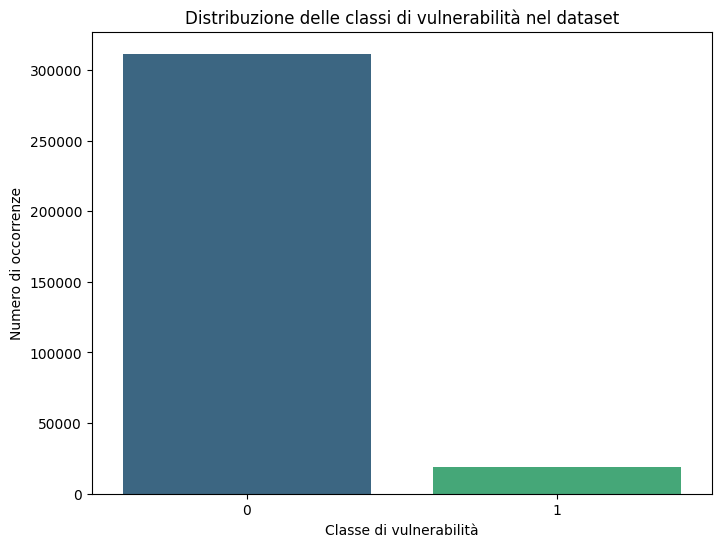

In [34]:
# Import delle librerie necessarie
import seaborn as sns
import matplotlib.pyplot as plt

# Calcolo della distribuzione delle classi di vulnerabilità
class_distribution = df['target'].value_counts()

# Plottaggio della distribuzione delle classi di vulnerabilità
plt.figure(figsize=(8, 6))
sns.barplot(x=class_distribution.index, y=class_distribution.values, palette='viridis')
plt.title('Distribuzione delle classi di vulnerabilità nel dataset')
plt.xlabel('Classe di vulnerabilità')
plt.ylabel('Numero di occorrenze')
plt.show()


size
120     255
127     255
122     253
123     252
130     243
       ... 
2393      2
1172      2
773       2
853       2
1392      2
Name: count, Length: 851, dtype: int64
Numero totale di valori nel grafico: 21444


<ipython-input-30-d832db1932ba>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=size_distribution.index, y=size_distribution.values, palette='viridis')


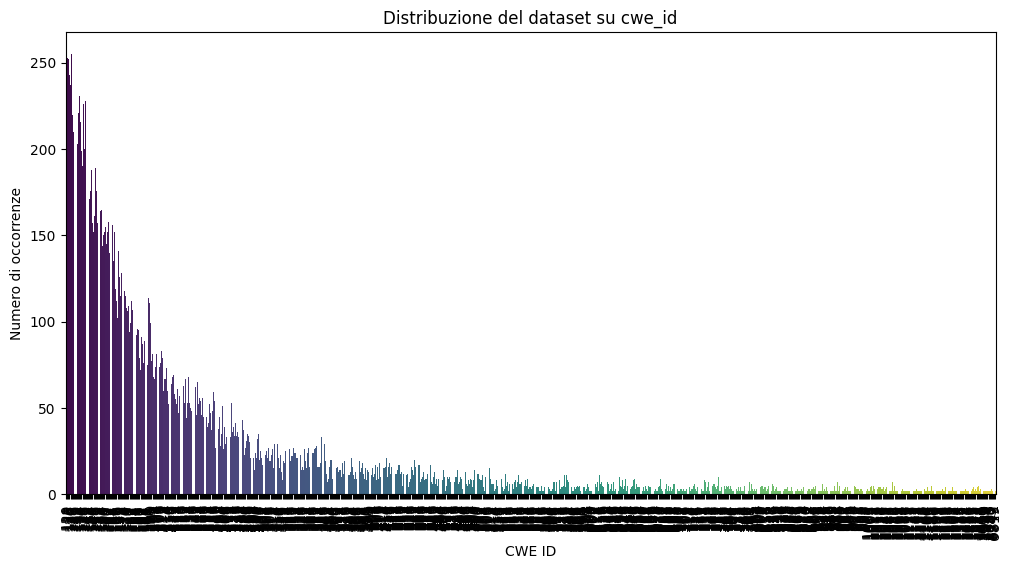

In [30]:
size_distribution = df['size'].value_counts()

# Filtra per tenere solo i cwe_id con più di 40 occorrenze
size_distribution = size_distribution[(size_distribution > 1) & (size_distribution < 256)]

# Stampa la distribuzione filtrata
print(size_distribution)

# Calcola il numero totale di valori nel grafico filtrato
total_values = size_distribution.sum()
print(f"Numero totale di valori nel grafico: {total_values}")

# Crea un grafico a barre della distribuzione filtrata
plt.figure(figsize=(12, 6))
sns.barplot(x=size_distribution.index, y=size_distribution.values, palette='viridis')
plt.title('Distribuzione del dataset su size')
plt.xlabel('CWE ID')
plt.ylabel('Numero di occorrenze')
plt.xticks(rotation=90)
plt.show()

<ipython-input-33-900431296a69>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cwe_frequency_filtered.index, y=cwe_frequency_filtered.values, palette='viridis')


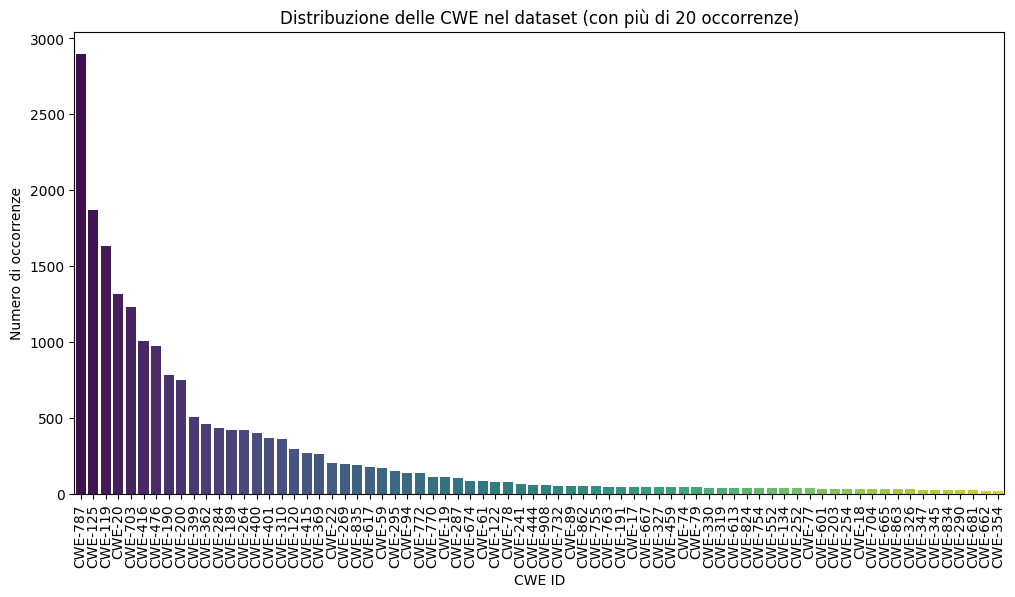

In [33]:
# Assicuriamoci che 'cwe' sia presente nel DataFrame
if 'cwe' in df.columns:
    # Espandi le liste di CWE in righe separate
    cwe_expanded = df.explode('cwe')

    # Selezioniamo solo le righe con target=1 (vulnerabili) e contiamo le occorrenze per ciascuna CWE
    cwe_frequency = cwe_expanded[cwe_expanded['target'] == 1]['cwe'].value_counts()

    # Filtra le CWE che hanno più di 20 occorrenze
    cwe_frequency_filtered = cwe_frequency[cwe_frequency > 20]

    # Plottiamo la distribuzione delle CWE filtrate
    plt.figure(figsize=(12, 6))
    sns.barplot(x=cwe_frequency_filtered.index, y=cwe_frequency_filtered.values, palette='viridis')
    plt.title('Distribuzione delle CWE nel dataset')
    plt.xlabel('CWE ID')
    plt.ylabel('Numero di occorrenze')
    plt.xticks(rotation=90)
    plt.show()